In [ ]:
#########################################################################################################
#   Authors and main roles:                                                                             #
#       - Mikel Martinez Garrido (s4752295): Code author, theory, documentation, report writing         #
#       - Cala González Penagos (S4616162): Testing, theory, experimental data analysis, report writing #
#   Course: Physics Laboratory III, University of Groningen                                             #
#   Date: June 2023                                                                                     #
#########################################################################################################

# DESCRIPTION: Python for RSA asymmetric cryptographic algorithm. 
# For demonstration, values are relatively small compared to practical application
import math
import matplotlib.pyplot as plt
import numpy as np

#Greatest common divisor of a and h
def gcd(a, h):
    temp = 0
    while(1):
        temp = a % h
        if (temp == 0):
            return h
        a = h
        h = temp
  

# Python Program to find the L.C.M. of two input number
def compute_lcm(x, y):

   # choose the greater number
   if x > y:
       greater = x
   else:
       greater = y

   while(True):
       if((greater % x == 0) and (greater % y == 0)):
           lcm = greater
           break
       greater += 1

   return lcm

def compute_d(e, phi):
    g, x, y = egcd_for_computing_d(e, phi)
    if g != 1:
        raise Exception('modular inverse does not exist')
    else:
        return x % phi

def egcd_for_computing_d(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = egcd_for_computing_d(b % a, a)
        return (g, x - (b // a) * y, y)

def encrypting(message, e, n):
    message_encrypted = []
    for m in message:
        message_encrypted.append(m**e % n)
    return message_encrypted

def decrypting(message_encrypted, d, n):
    message_decrypted = []
    for dec in message_encrypted:
        message_decrypted.append(dec**d % n)
    return message_decrypted

In [3]:
#We pick some prime numbers p and q
p=44189	
q=44201
n=p*q
phi = compute_lcm(p-1,q-1)
e=17

while (e < phi):
  
    # e must be co-prime to phi and
    # smaller than phi.
    if(gcd(e, phi) == 1):
        break
    else:
        e = e+1
print(f"p is {p}, q is {q}, n is {n}, phi is {phi} and e is {e}")
#lets compute d
compute_d(e,phi)
print(f"the public key is: e = {e} and n = {n}")
print(f"the private key is: d = {compute_d(e,phi)}")

p is 44189, q is 44201, n is 1953197989, phi is 488277400 and e is 19
the public key is: e = 19 and n = 1953197989
the private key is: d = 436879779


In [ ]:
#message trial
message =(456,894,987,486,169,168,486,516,654,165,795,567)
print(f"The message is: {message}")
print(f"The message encrypted is: {encrypting(message, e, n)}")
print(f"The decrypted message is: {decrypting(encrypting(message, e, n), compute_d(e,phi), n)}")

# ENCRYPTING AND DECRYPTING FUNCTIONS

In [ ]:
#ENCRYPTING AND DECRYPTING CODE
import time
import matplotlib.pyplot as plt
import statistics as stat
import pylab
import numpy as np
message =(84,117,32,101,114,101,32,117,110,32,115,97,112,111)   #Tu ere un sapo

loops = 10

e_numbers = [3,17,65537]

p_numbers = [13,71,97,101,103,107,179,229,233,239,311,313,317,347,349,353,401,409,419,521,557,641,709,1009,1129,1289,1367,1637,1801,1979,2113,2351,2521,2683,2803,2971,3637,3803,3967,4289,4483,4651,4999,5171]

q_numbres = [191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,]
print(len(p_numbers))
print(len(q_numbres))
#q_numbres = [11,29,67,113,167,173,257,263,269,271,283,347,349,367,373,379,383,389,397,457,631,733,887,1061,1249,1549,1693,2003,2143,2311,2459,2777,2939,3119,3301,3461,4093,4259,4447,4789,4967,5113,5477,5557]

def time_n_counter(p_all,q_all,e, message,loops):
    if len(p_all) == len(q_all):
        for e in e:
            times_encrypting_list = []
            times_decrypting_list = []

            times_encrypting_averages = []
            times_decrypting_averages = []

            times_encrypting_errors = []
            times_decrypting_errors = []

            for counts in range(loops):
                n_values = []
                encrypting_times = []
                decrypting_times = []
                for i in range(len(p_all)):
                    p = p_all[i]
                    q = q_all[i]
                    n=p*q
                    n_values.append(n)

                    phi = compute_lcm(p-1,q-1)

                    while (e < phi):
        
                        # e must be co-prime to phi and
                        # smaller than phi.
                        if(gcd(e, phi) == 1):
                            break
                        else:
                            e = e+1
                    
                    #encrypting time
                    start_encrypting = time.time()
                    encrypting(message, e, n)
                    end_encrypting = time.time()

                    encryp = end_encrypting - start_encrypting

                    #decrypting time
                    start_decrypting = time.time()
                    decrypting(encrypting(message, e, n), compute_d(e,phi), n)
                    end_decrypting = time.time()

                    decryp = end_decrypting - start_decrypting

                    #appending times
                    encrypting_times.append(encryp)
                    decrypting_times.append(decryp)
                
                times_encrypting_list.append(encrypting_times)
                times_decrypting_list.append(decrypting_times)
            
            #Computing means and stdes for encrypting
            for i in range(len(p_all)):
                values = []
                for j in range(loops):
                    x = times_encrypting_list[j][i]
                    values.append(x)
                means = stat.mean(values)
                devs = stat.stdev(values)
                times_encrypting_averages.append(means)
                times_encrypting_errors.append(devs)
            
            #Computing means and stdes for decrypting
            for i in range(len(p_all)):
                values = []
                for j in range(loops):
                    x = times_decrypting_list[j][i]
                    values.append(x)
                means = stat.mean(values)
                devs = stat.stdev(values)
                times_decrypting_averages.append(means)
                times_decrypting_errors.append(devs)

            #DECRYPTING TIMES
            # create nth degree polynomial fit
            n_decryp = 2
            zn_decryp = np.polyfit(n_values, times_decrypting_averages,n_decryp) 
            pn_decryp = np.poly1d(zn_decryp) # construct polynomial 

            # create qth degree polynomial fit
            q_decryp = 3
            zq_decryp = np.polyfit(n_values, times_decrypting_averages,q_decryp) 
            pq_decryp = np.poly1d(zq_decryp)

            # plot data and fit
            xx_decryp = np.linspace(0, max(n_values), 500)
            pylab.plot(xx_decryp, pn_decryp(xx_decryp),'-g', xx_decryp, pq_decryp(xx_decryp),'-b')
            pylab.errorbar(n_values, times_decrypting_averages, yerr=times_decrypting_errors, fmt='r.')

            # customise graph
            pylab.title(f"For e being: {e}, Decryption times")
            pylab.legend(['degree '+str(n_decryp),'degree '+str(q_decryp),'data'])
            pylab.xlabel("key length n = p*q")
            pylab.ylabel("time in s")

            pylab.show()

            #ENCRYPTING TIMES
            # create nth degree polynomial fit
            n_encryp = 2
            zn_encryp = np.polyfit(n_values, times_encrypting_averages,n_encryp) 
            pn_encryp = np.poly1d(zn_encryp) # construct polynomial 

            # create qth degree polynomial fit
            q_encryp = 3
            zq_encryp = np.polyfit(n_values, times_encrypting_averages,q_encryp) 
            pq_encryp = np.poly1d(zq_encryp)

            # plot data and fit
            xx_encryp = np.linspace(0, max(n_values), 500)
            pylab.plot(xx_encryp, pn_encryp(xx_encryp),'-g', xx_encryp, pq_encryp(xx_encryp),'-b')
            pylab.errorbar(n_values, times_encrypting_averages, yerr=times_encrypting_errors, fmt='r.')

            # customise graph
            pylab.title(f"For e being: {e}, Encryption times")
            pylab.legend(['degree '+str(n_encryp),'degree '+str(q_encryp),'data'])
            pylab.xlabel("key length n = p*q")
            pylab.ylabel("time in s")

            pylab.show()

    else:
        print(len(q_all))
        print(len(p_all))
        print("The number of p's and q's is not the same")
        


time_n_counter(p_numbers, q_numbres, e_numbers, message,loops)

44
44


# Decryption and encryption times for e=3,17,65537

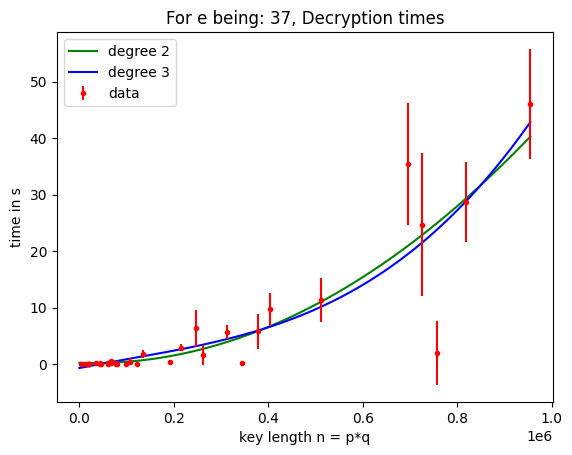

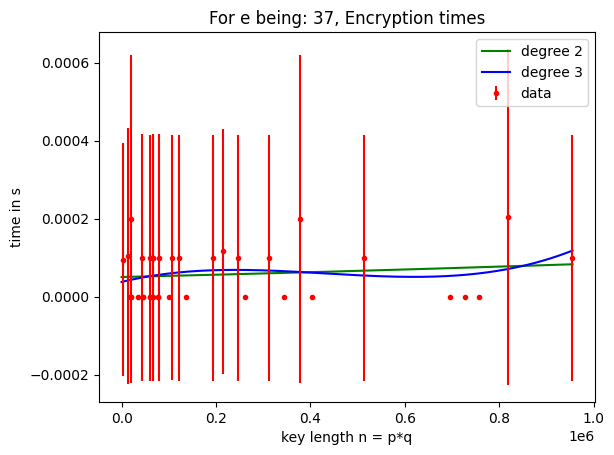

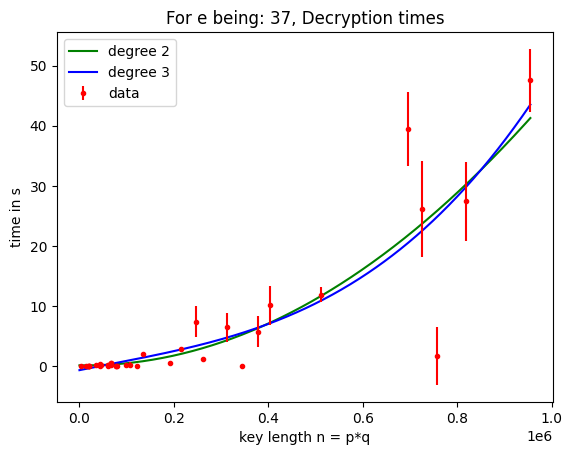

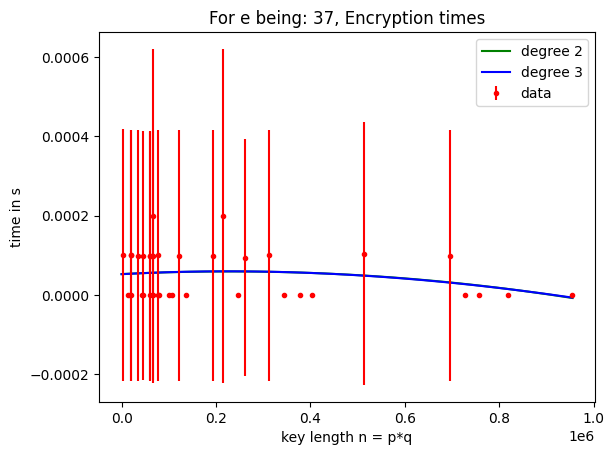

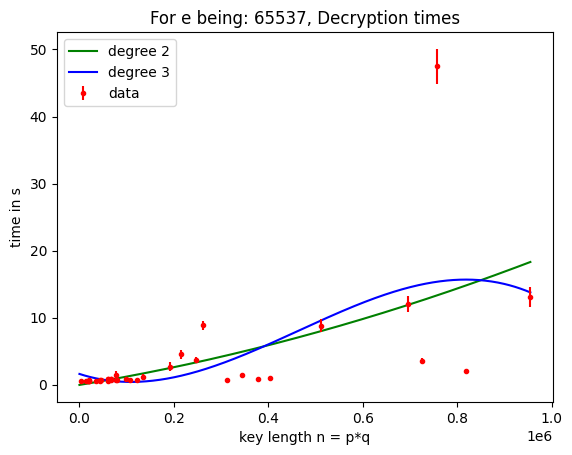

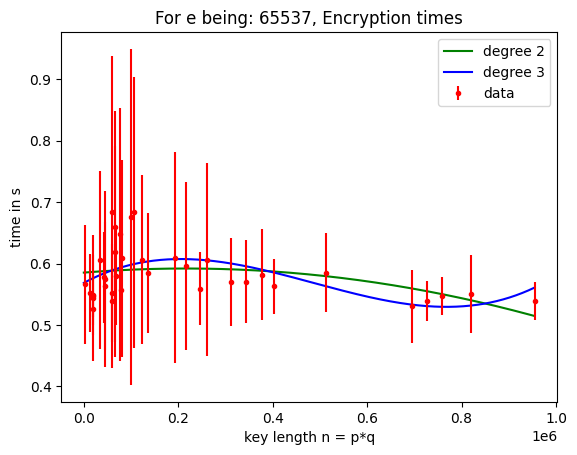

In [14]:
message =(84,117,32,101,114,101,32,117,110,32,115,97,112,111)
loops = 10
e_numbers = [3,17,65537]

p_numbers = [13,71,97,101,103,107,179,229,233,239,311,313,317,347,349,353,401,409,419,521,557,641,709,1009,1129,1289,1367,1637,1801,1979,2113,2683,3637,3803,3967,4289,4999]

q_numbres = [191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191]

time_n_counter(p_numbers, q_numbres, e_numbers, message,loops)